# Credit Card Lead Prediction

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.



The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 



In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.



Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

Customer details (gender, age, region etc.)
Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

# Importing Libraries 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import dataset

In [2]:
train = pd.read_csv('train_s3TEQDk.csv')
test  = pd.read_csv('test_mSzZ8RL.csv')

# EDA

In [3]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
test.tail()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
105307,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes
105308,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No
105309,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No
105310,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes
105311,F2NOYPPZ,Male,27,RG256,Salaried,X1,21,No,591565,No


0    187437
1     58288
Name: Is_Lead, dtype: int64


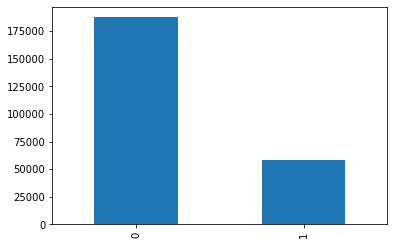

In [5]:
print(train.Is_Lead.value_counts())
train.Is_Lead.value_counts().plot(kind='bar');

# From the bar chart we are seeing only 23.72 % of total population are interested and rest are not interested for the Credit Card.



# Data Cleaning

In [6]:
train_test_data = [train,test]
#missing values
for dataset in train_test_data:
    print(dataset.isnull().sum())

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64
ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64


# "Credit_Product" missing value treatment

In [7]:
for dataset in train_test_data:
    dataset['Credit_Product'].fillna("NA",inplace=True)

# Avg_Account_Balance

In [8]:
#Let's find out the min and max value
print(f"train max value of avg_account_balance :{train['Avg_Account_Balance'].max()}")
print(f"train min value of avg_account_balance :{train['Avg_Account_Balance'].min()}")
print("\n")
print(f"test max value of avg_account_balance :{test['Avg_Account_Balance'].max()}")
print(f"test min value of avg_account_balance :{test['Avg_Account_Balance'].min()}")

train max value of avg_account_balance :10352009
train min value of avg_account_balance :20790


test max value of avg_account_balance :9908858
test min value of avg_account_balance :22597


In [9]:
#Avg_Account_Balance <= 1000000  == lower income grp
#Avg_Account_Balance > 1000000  and <= 2000000 == higher income grp
#Avg_Account_Balance > 1000000  and <= 2000000 == more higher income grp
#Avg_Account_Balance > 3000000  == rich income grp
train.loc[train['Avg_Account_Balance'] <= 800000,'Avg_Account_Balance']                                                = 0
train.loc[(train['Avg_Account_Balance'] > 800000) & (train['Avg_Account_Balance'] <= 1500000),'Avg_Account_Balance']   = 1
train.loc[(train['Avg_Account_Balance'] > 1500000) & (train['Avg_Account_Balance'] <= 2500000),'Avg_Account_Balance']  = 2
train.loc[train['Avg_Account_Balance'] > 2500000,'Avg_Account_Balance']                                                = 3

In [10]:
test.loc[test['Avg_Account_Balance'] <= 800000,'Avg_Account_Balance']                                               = 0
test.loc[(test['Avg_Account_Balance'] > 800000) & (test['Avg_Account_Balance'] <= 1500000),'Avg_Account_Balance']   = 1
test.loc[(test['Avg_Account_Balance'] > 1500000) & (test['Avg_Account_Balance'] <= 2500000),'Avg_Account_Balance']   = 2
test.loc[test['Avg_Account_Balance'] > 2500000,'Avg_Account_Balance']                                                = 3

In [11]:
train['Avg_Account_Balance'].value_counts()

0    104622
1     90154
2     36207
3     14742
Name: Avg_Account_Balance, dtype: int64

In [12]:
test['Avg_Account_Balance'].value_counts()

0    44855
1    38420
2    15665
3     6372
Name: Avg_Account_Balance, dtype: int64

# Gender

In [13]:
gender_map = {'Male':0,'Female':1}
for dataset in train_test_data:
    dataset.Gender = dataset.Gender.map(gender_map)

# Age

In [14]:
#Let's find out the min and max value of Age
print(f"train max value of Age :{train['Age'].max()}")
print(f"train min value of Age :{train['Age'].min()}")
print("\n")
print(f"test max value of Age :{test['Age'].max()}")
print(f"test min value of Age :{test['Age'].min()}")

train max value of Age :85
train min value of Age :23


test max value of Age :85
test min value of Age :24


# Age Binning

In [15]:
#Age <= 30  == young
#Age > 30  and <= 40 == mid age
#Age > 40  and <= 60 == higher mid age
#Age > 60  == old age grp
train.loc[train['Age'] <= 30,'Age']                          = 0
train.loc[(train['Age'] > 30) & (train['Age'] <= 40),'Age']  = 1
train.loc[(train['Age'] > 40) & (train['Age'] <= 60),'Age']  = 2
train.loc[train['Age'] > 60,'Age']                           = 3

In [16]:
test.loc[test['Age'] <= 30,'Age']                          = 0
test.loc[(test['Age'] > 30) & (test['Age'] <= 40),'Age']   = 1
test.loc[(test['Age'] > 40) & (test['Age'] <= 60),'Age']   = 2
test.loc[test['Age'] > 60,'Age']                           = 3

In [17]:
train.Age.value_counts()

2    98258
0    68140
1    44729
3    34598
Name: Age, dtype: int64

In [18]:
test.Age.value_counts()

2    42111
0    29236
1    19049
3    14916
Name: Age, dtype: int64

# Vintage

In [19]:
#Let's find out the min and max value of Vintage
print(f"train max value of Vintage :{train['Vintage'].max()}")
print(f"train min value of Vintage :{train['Vintage'].min()}")
print("\n")
print(f"test max value of Vintage :{test['Vintage'].max()}")
print(f"test min value of Vintage :{test['Vintage'].min()}")

train max value of Vintage :135
train min value of Vintage :7


test max value of Vintage :135
test min value of Vintage :7


# Vintage Binning

In [20]:
#Vintage <= 25  == low
#Vintage > 25  and <= 50 == medium
#Vintage > 50  and <= 100 == high
#Vintage > 100  == higher
train.loc[train['Vintage'] <= 25,'Vintage']                               = 0
train.loc[(train['Vintage'] > 25) & (train['Vintage'] <= 50),'Vintage']   = 1
train.loc[(train['Vintage'] > 50) & (train['Vintage'] <= 100),'Vintage']  = 2
train.loc[train['Vintage'] > 100,'Vintage']                               = 3

In [21]:
test.loc[test['Vintage'] <= 25,'Vintage']                               = 0
test.loc[(test['Vintage'] > 25) & (test['Vintage'] <= 50),'Vintage']    = 1
test.loc[(test['Vintage'] > 50) & (test['Vintage'] <= 100),'Vintage']   = 2
test.loc[test['Vintage'] > 100,'Vintage']                               = 3

In [22]:
train.Vintage.value_counts()

0    86104
2    72324
1    67589
3    19708
Name: Vintage, dtype: int64

# Occupation

In [23]:
for dataset in train_test_data:
    print(dataset['Occupation'].value_counts())

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64
Self_Employed    43192
Salaried         30913
Other            30131
Entrepreneur      1076
Name: Occupation, dtype: int64


# One Hot encoding Occupation

In [24]:
Occupation_dummies_train = pd.get_dummies(train.Occupation, prefix='Occupation',drop_first=True)
train = pd.concat([train,Occupation_dummies_train],axis=1)
train.drop(['Occupation'],axis=1,inplace=True)
Occupation_dummies_test = pd.get_dummies(test.Occupation, prefix='Occupation',drop_first=True)
test = pd.concat([test,Occupation_dummies_test],axis=1)
test.drop(['Occupation'],axis=1,inplace=True)

In [25]:
#Occupation Map
# occupation_map = {'Self_Employed':0,'Salaried':1,'Entrepreneur':2,'Other':3}
# for dataset in train_test_data:
#     dataset.Occupation = dataset.Occupation.map(occupation_map)

# Channel_Code

In [26]:
for dataset in train_test_data:
    print(dataset['Channel_Code'].value_counts())

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64
X1    44484
X3    29269
X2    29176
X4     2383
Name: Channel_Code, dtype: int64


# One hot encoding Channel_Code

In [27]:
channel_code_dummies_train = pd.get_dummies(train.Channel_Code, prefix='Channel_code',drop_first=True)
train = pd.concat([train,channel_code_dummies_train],axis=1)
train.drop(['Channel_Code'],axis=1,inplace=True)
channel_code_dummies_test = pd.get_dummies(test.Channel_Code, prefix='Channel_code',drop_first=True)
test = pd.concat([test,channel_code_dummies_test],axis=1)
test.drop(['Channel_Code'],axis=1,inplace=True)

In [28]:
#Channel_Code Map
# Channel_Code_map = {'X1':0,'X2':1,'X3':2,'X4':3}
# for dataset in train_test_data:
#     dataset.Channel_Code = dataset.Channel_Code.map(Channel_Code_map)

In [29]:
train_test_data = [train,test]

# Credit_Product

In [30]:
for dataset in train_test_data:
    print(dataset['Credit_Product'].value_counts())

No     144357
Yes     72043
NA      29325
Name: Credit_Product, dtype: int64
No     61608
Yes    31182
NA     12522
Name: Credit_Product, dtype: int64


In [31]:
#Credit_Product Map
Credit_Product_map = {'No':0,'Yes':1}
for dataset in train_test_data:
    dataset.Credit_Product = dataset.Credit_Product.map(Credit_Product_map)

# Is_Active

In [32]:
for dataset in train_test_data:
    print(dataset['Is_Active'].value_counts())

No     150290
Yes     95435
Name: Is_Active, dtype: int64
No     63797
Yes    41515
Name: Is_Active, dtype: int64


In [33]:
#Is_Active Map
Is_Active_map = {'No':0,'Yes':1}
for dataset in train_test_data:
    dataset.Is_Active = dataset.Is_Active.map(Is_Active_map)

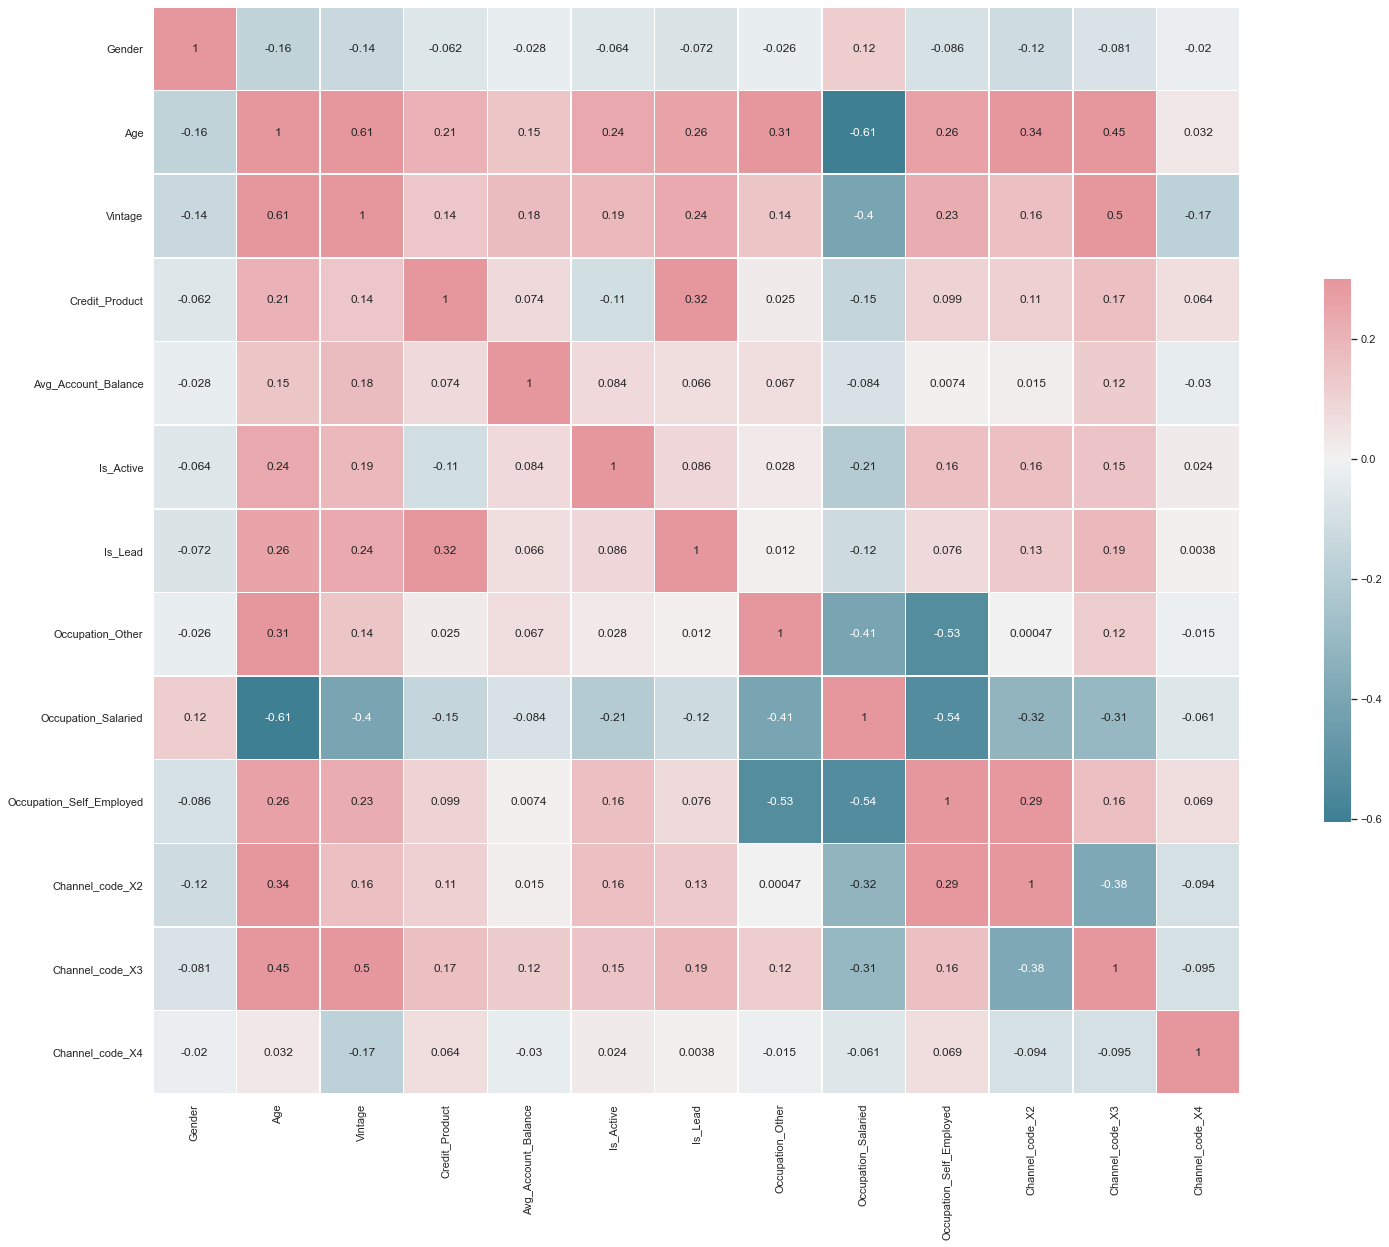

In [34]:
#print('Training Features shape: ', data.shape)
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(train.corr(), cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# As we see "Vintage" , "Channel_code" are more related with "Age" , we can drop one of them, so let's drop channel_code

# Region_Code 

In [35]:
for dataset in train_test_data:
    dataset['Region_Code'] = dataset.Region_Code.str[2:].astype(int)    

In [36]:
train.head()

,ID,Gender,Age,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_code_X2,Channel_code_X3,Channel_code_X4
0,NNVBBKZB,1,3,268,1,0.0,1,0,0,1,0,0,0,1,0
1,IDD62UNG,1,0,277,1,0.0,0,0,0,0,1,0,0,0,0
2,HD3DSEMC,1,2,268,1,0.0,1,1,0,0,0,1,0,1,0
3,BF3NC7KV,0,1,270,0,0.0,0,0,0,0,1,0,0,0,0
4,TEASRWXV,1,0,282,1,0.0,1,0,0,0,1,0,0,0,0


In [37]:
# for dataset in train_test_data:
#     dataset.drop(['Region_Code','Vintage','Occupation_Salaried'],axis=1,inplace=True)

In [38]:
train_data = train.drop(['ID','Is_Lead'],axis=1)

In [39]:
X = train_data.values

In [40]:
target = train['Is_Lead']

In [41]:
y = target.values

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42,stratify = y)

In [43]:
print("Shape of X_train :", X_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (172007, 13)
Shape of X_test : (73718, 13)
Shape of y_train : (172007,)
Shape of y_test : (73718,)


In [44]:
X_train

array([[  0.,   3., 283., ...,   0.,   1.,   0.],
       [  0.,   0., 256., ...,   0.,   0.,   0.],
       [  0.,   3., 283., ...,   0.,   1.,   0.],
       ...,
       [  0.,   1., 283., ...,   1.,   0.,   0.],
       [  0.,   0., 251., ...,   0.,   0.,   0.],
       [  1.,   0., 260., ...,   0.,   0.,   0.]])

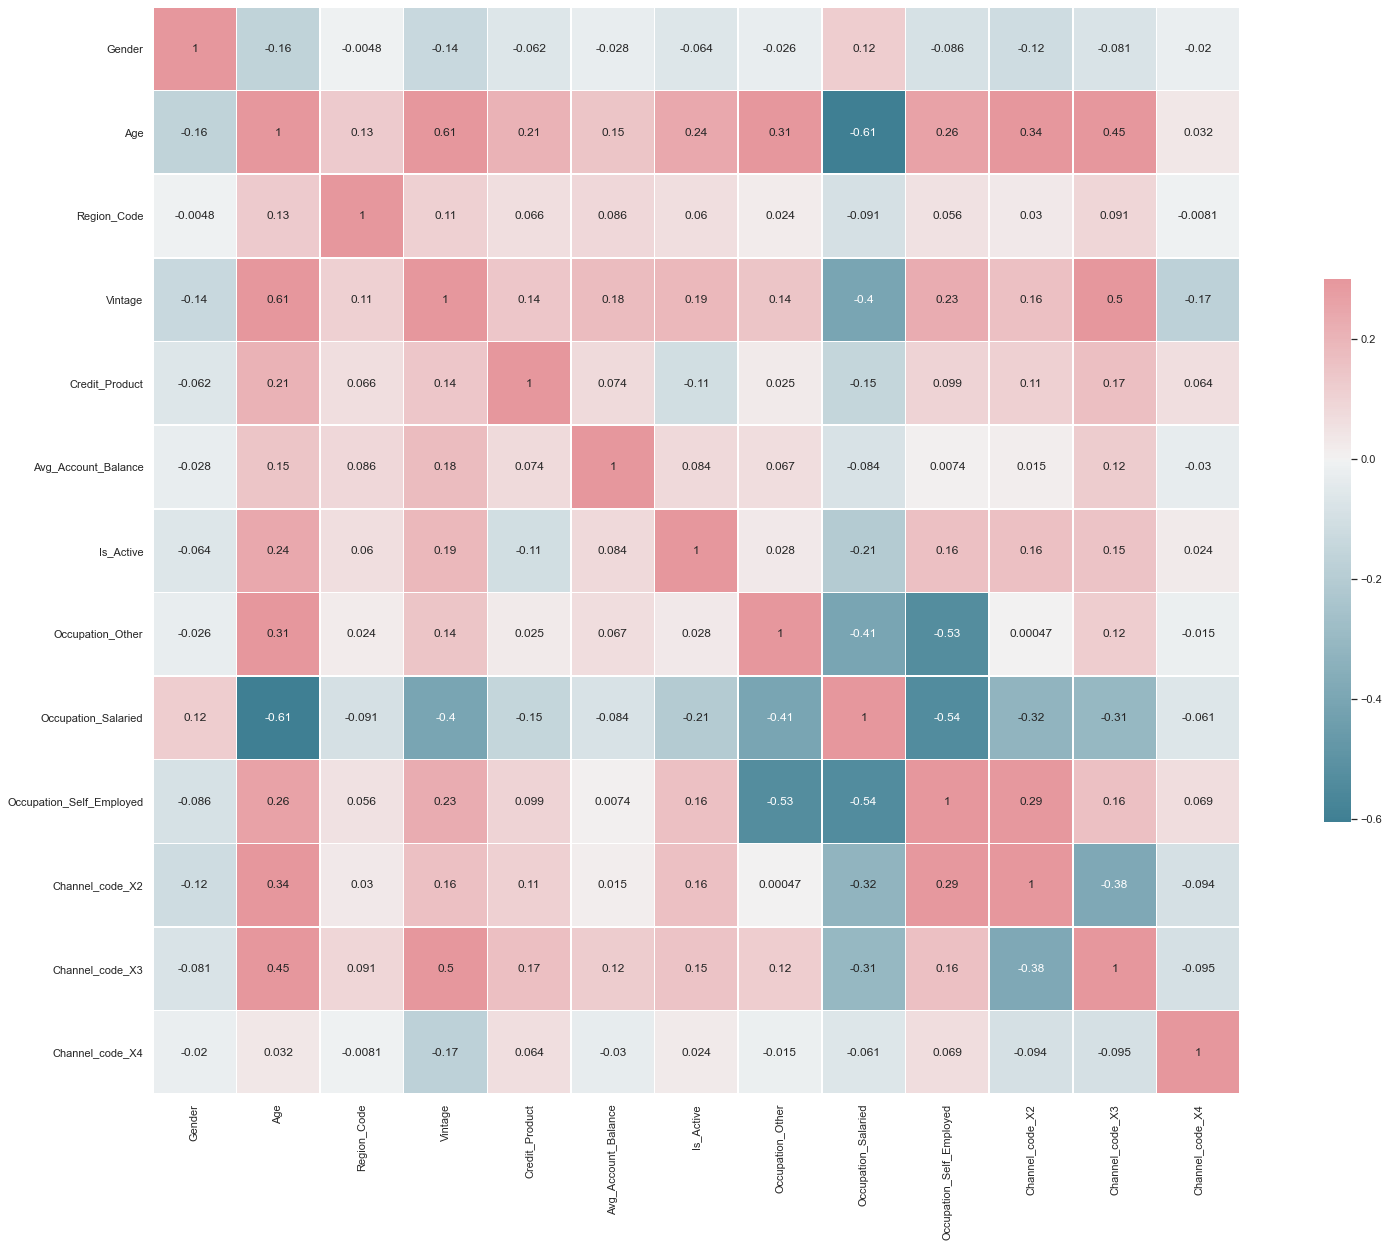

In [45]:
#print('Training Features shape: ', data.shape)
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(train_data.corr(), cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [46]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# #sc = StandardScaler()
# #X_train = sc.fit_transform(X_train)
# #X_test = sc.fit_transform(X_test)
# X_train = scaler.fit_transform(X_train)
# X_test  = scaler.fit_transform(X_test)

# Modelling with Ensemble Techniques

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#import sklearn.neighbors._base
#import sys
#sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [48]:
model =LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=30,
    max_depth=7,
    learning_rate=0.1,
    n_estimators=150,
    subsample_for_bin=200000,
    objective=None,
    class_weight=None,
    min_split_gain=0.0,
    min_child_weight=0.001,
    min_child_samples=20,
    subsample=1.0,
    subsample_freq=0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=42,
    n_jobs=-1,
    silent=True,
    importance_type='split'
)

In [49]:
model.fit(X_train,y_train)

LGBMClassifier(max_depth=7, n_estimators=150, num_leaves=30, random_state=42)

In [50]:
y_pred_lgbm = model.predict(X_test)
accuracy_lgbm = accuracy_score(y_test,y_pred_lgbm)
print("Training Accuracy: ", model.score(X_train, y_train))
print('Testing Accuarcy: ', model.score(X_test, y_test))

Training Accuracy:  0.8606568337335109
Testing Accuarcy:  0.8591524458069942


In [51]:
model.feature_importances_

array([203, 576, 869, 532, 360, 411, 286, 205, 292, 157, 215, 149,  95])

In [52]:
X

array([[  1.,   3., 268., ...,   0.,   1.,   0.],
       [  1.,   0., 277., ...,   0.,   0.,   0.],
       [  1.,   2., 268., ...,   0.,   1.,   0.],
       ...,
       [  1.,   0., 281., ...,   0.,   0.,   0.],
       [  1.,   0., 273., ...,   0.,   0.,   0.],
       [  0.,   0., 269., ...,   0.,   0.,   0.]])

<AxesSubplot:>

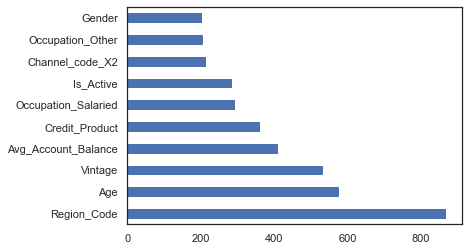

In [53]:
(pd.Series(model.feature_importances_, index=train_data.columns)
   .nlargest(10)
   .plot(kind='barh'))  

In [54]:
#Decission Tree
# dt = DecisionTreeClassifier()
# clf_dt = dt.fit(X_train,y_train)
# y_pred_dt=clf_dt.predict(X_test)
# accuracy_dt = accuracy_score(y_test,y_pred_dt)
# print(accuracy_score(y_test,y_pred_dt))

In [55]:
# Using a Random Forest classifier 
# model_rf = RandomForestClassifier(n_estimators=100,random_state=0)
# model_rf.fit(X_train,y_train)
# y_pred_rf = model_rf.predict(X_test)
# accuracy_rf = accuracy_score(y_test,y_pred_rf)
# print("Training Accuracy: ", model_rf.score(X_train, y_train))
# print('Testing Accuarcy: ', model_rf.score(X_test, y_test))

In [56]:
# cl_report = classification_report(y_test,y_pred_rf)
# print(cl_report)

# Build Random Forest Model with hyperparameters

In [57]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [2,4]
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]

In [58]:
# Create the param grid
# param_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(param_grid)

In [59]:
# rf_Model = RandomForestClassifier()

In [60]:
# from sklearn.model_selection import GridSearchCV
# rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [61]:
# rf_Grid.fit(X_train, y_train)

In [62]:
# rf_Grid.best_params_

In [63]:
# print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
# print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

In [64]:
#A balanced random forest randomly under-samples each boostrap sample to balance it.
# model = BalancedRandomForestClassifier(n_estimators = 100, random_state = 0)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# accuracy_balanced_clf = accuracy_score(y_test,y_pred)
# print("Training Accuracy: ", model.score(X_train, y_train))
# print('Testing Accuarcy: ', model.score(X_test, y_test))

In [65]:
# cl_report = classification_report(y_test,y_pred)
# print(cl_report)

In [66]:
#Confusion Matrix
# plt.rcParams['figure.figsize'] = (5, 5)
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot = True, cmap = 'copper')
# plt.show()

In [67]:
#Logistic Regression
# model_logit = LogisticRegression()
# model_logit.fit(X_train, y_train)
# y_pred_logit = model_logit.predict(X_test)
# accuracy_logit = accuracy_score(y_test,y_pred_logit)
# print("Training Accuracy: ", model_logit.score(X_train, y_train))
# print('Testing Accuarcy: ', model_logit.score(X_test, y_test))

In [68]:
#Confusion Matrix Logistic Regression
# plt.rcParams['figure.figsize'] = (5, 5)
# cm_logit = confusion_matrix(y_test, y_pred_logit)
# sns.heatmap(cm_logit, annot = True, cmap = 'Greens')
# plt.show()

In [69]:
#KNN
# knn = KNeighborsClassifier(n_neighbors=6)
# clf_knn = knn.fit(X_train,y_train)
# y_pred_knn = clf_knn.predict(X_test)
# accuracy_knn = accuracy_score(y_test,y_pred_knn)
# print(accuracy_score(y_test,y_pred_knn))

In [70]:
#Naive Bayes
# from sklearn.naive_bayes import GaussianNB
# clf_nb= GaussianNB()
# # sv = SVC()
# clf_nb = clf_nb.fit(X_train,y_train)
# y_pred_nb = clf_nb.predict(X_test)
# print(accuracy_score(y_test,y_pred_nb))

In [71]:
#Lets use k-fold cross validation
# from sklearn.model_selection import KFold,cross_val_score
# k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

In [72]:
#Decission Tree
# score= cross_val_score(dt,X_train,y_train,cv=k_fold,n_jobs=1,scoring='accuracy')
# print(score)
# print(round(np.mean(score),2))

In [73]:
#Random Forest
# score= cross_val_score(model_rf,X_train,y_train,cv=k_fold,n_jobs=1,scoring='accuracy')
# print(round(np.mean(score),2))

In [74]:
#Support Vector
# score= cross_val_score(sv,X_train,y_train,cv=k_fold,n_jobs=1,scoring='accuracy')
# print(round(np.mean(score),2))

**Applying Sampling Technique**

**Up sampling with SMOTE**

In [75]:
# from imblearn.over_sampling import SMOTE
# x_resample, y_resample  = SMOTE().fit_resample(X, y.ravel())

# print(x_resample.shape)
# print(y_resample.shape)

In [76]:
# from sklearn.model_selection import train_test_split

# x_train2, x_test2, y_train2, y_test2 = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# print(x_train2.shape)
# print(y_train2.shape)
# print(x_test2.shape)
# print(y_test2.shape)

In [77]:
# standardization
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# x_train2 = sc.fit_transform(x_train2)
# x_test2 = sc.transform(x_test2)

In [78]:
# Random Forest Classifier
# from sklearn.ensemble import RandomForestClassifier

# model_o = RandomForestClassifier()
# model_o.fit(x_train2, y_train2)

# y_pred = model_o.predict(x_test2)

# print("Training Accuracy: ", model_o.score(x_train2, y_train2))
# print('Testing Accuarcy: ', model_o.score(x_test2, y_test2))

# # confusion matrix
# cm = confusion_matrix(y_test2, y_pred)
# plt.rcParams['figure.figsize'] = (5, 5)
# sns.heatmap(cm, annot = True, cmap = 'winter')
# plt.show()
# # classification report
# cr = classification_report(y_test2, y_pred)
# print(cr)

# XGBoost Classifier

In [79]:
xgb = XGBClassifier(n_estimators=100)

In [80]:
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test,y_pred_xgb)
print("Training Accuracy: ", xgb.score(X_train, y_train))
print('Testing Accuarcy: ', xgb.score(X_test, y_test))
print(accuracy_xgb)

Training Accuracy:  0.859023179289215
Testing Accuarcy:  0.8590439241433571
0.8590439241433571


In [81]:
#Xg Boost
# score= cross_val_score(xgb,X_train,y_train,cv=k_fold,n_jobs=1,scoring='accuracy')
# print(round(np.mean(score),2))

In [82]:
## Hyperparameter optimization using RandomizedSearchCV
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# import xgboost

# Feature scaling

In [83]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# #sc = StandardScaler()
# #X_train = sc.fit_transform(X_train)
# #X_test = sc.fit_transform(X_test)
# X_train = scaler.fit_transform(X_train)
# X_test  = scaler.fit_transform(X_test)

In [84]:
# X_train.shape

# ANN Model Building

In [85]:
# #Keras library
# import keras
# from keras.models import Sequential
# from keras.layers import Dense
# #Initialise ANN
# classifier_ann = Sequential()
# #1st hidden layer
# classifier_ann.add(Dense(activation='relu',output_dim=6,init='uniform'))
# #2nd hidden layer
# classifier_ann.add(Dense(activation='relu',output_dim=5,init='uniform'))
# #output layer
# classifier_ann.add(Dense(activation='sigmoid',output_dim=1,init='uniform'))
# #compile 
# classifier_ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# #Fit the model
# classifier_ann.fit(X_train,y_train,batch_size=100,epochs=50)

In [86]:
# ids = test['ID']
# predictions = rf_Grid.predict(test.drop('ID', axis=1))

# Final Model  "Random Forest" and "XGboost" gives better result

In [87]:
# output = pd.DataFrame({ 'ID' : ids, 'Is_Lead': predictions })
# output.to_csv('predictions_rf_hyper.csv', index = False)
# output.head()